In [2]:
from numpy import hstack
from numpy.random import normal
import matplotlib.pyplot as plt
import pandas as pd
X1 = normal(loc=20, scale=5, size=3000)
X2 = normal(loc=40, scale=5, size=7000)
X = hstack((X1, X2))
# reshape into a table with one column
X = X.reshape((len(X), 1))

In [3]:
X.shape

(10000, 1)

In [26]:
returnsant=pd.read_csv('returnsant.csv')

In [7]:
valuevsgrowth =pd.read_csv('returnsant.csv')['Factor - Value vs Growth']

In [20]:
interestrates=pd.read_csv('returnsant.csv')['Factor - Interest Rates']

<AxesSubplot:ylabel='Density'>

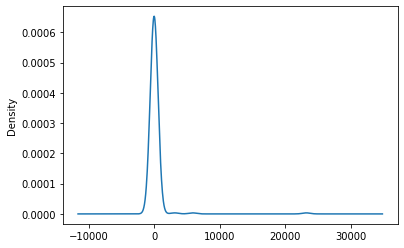

In [21]:
interestrates.plot(kind='kde')

In [34]:
returnsant=returnsant.drop("perf_date",axis=1) 

In [29]:
array=returnsant.values

In [30]:
array.shape

(195, 20)

In [4]:
from sklearn.mixture import GaussianMixture

# fit model
model = GaussianMixture(n_components=2, init_params='random')
model.fit(X)
# predict latent values
yhat = model.predict(X)

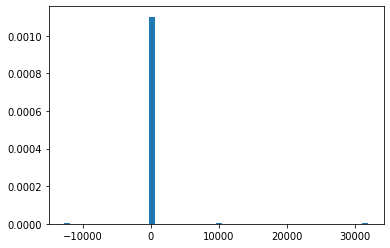

In [13]:
plt.hist(valuevsgrowth, bins=50, density=True)
plt.show()

<AxesSubplot:ylabel='Density'>

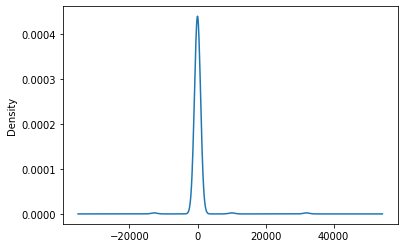

In [14]:
valuevsgrowth.plot(kind='kde')

In [15]:
import numpy as np
def find_anomalies(data):
    #define a list to accumlate anomalies
    anomalies = []
    
    
    # Generate outliers
    indexs=[]
    i=0
    for outlier in data:
        # Set upper and lower limit to 3 standard deviation
        data_std = np.std(data)
        data_mean = np.median(data)
        cut_off = data_std * 3
    
        lower_limit  = data_mean - cut_off 
        upper_limit = data_mean + cut_off
        if outlier > upper_limit or outlier < lower_limit:
            anomalies.append(outlier)
            indexs.append(i)
            data[i]=data_mean
        i+=1
    print("The anomalies are at indexs {} with values {}".format(indexs, anomalies))
    return data

In [16]:
find_anomalies(valuevsgrowth)

The anomalies are at indexs [179, 180, 181, 192] with values [-12739.63101, 10069.79161, 31963.20149, 0.126822666]


0     -0.012632
1      0.012010
2     -0.001646
3      0.002147
4      0.019188
         ...   
190    0.005199
191    0.044041
192   -0.000972
193    0.011823
194    0.011146
Name: Factor - Value vs Growth, Length: 195, dtype: float64

In [22]:
find_anomalies(interestrates)

The anomalies are at indexs [24, 25, 26, 34, 194] with values [23213.71104, 5867.505916, 3149.873353, 0.035962977, -0.028067551]


0     -0.006530
1     -0.002498
2     -0.014418
3     -0.013622
4      0.005999
         ...   
190    0.012773
191   -0.005114
192   -0.013568
193   -0.009306
194    0.002805
Name: Factor - Interest Rates, Length: 195, dtype: float64

In [23]:
interestrates.describe()

count    195.000000
mean       0.002368
std        0.009687
min       -0.021461
25%       -0.003911
50%        0.002805
75%        0.008740
max        0.028664
Name: Factor - Interest Rates, dtype: float64

<AxesSubplot:ylabel='Density'>

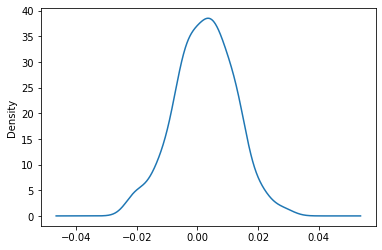

In [24]:
interestrates.plot(kind='kde')

<AxesSubplot:ylabel='Density'>

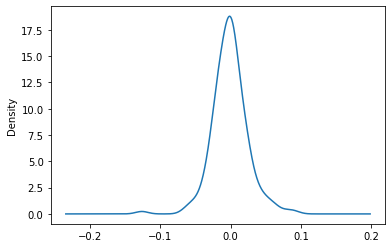

In [19]:
valuevsgrowth.plot(kind='kde')

In [18]:
print(yhat[:100])
# check latent value for last few points
print(yhat[-100:])

[0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 0 0 0 1
 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1]
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [73]:
print(yhat[:100])
# check latent value for last few points
print(yhat[-100:])

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[0 1 0 0 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 1 0 1 0 0
 0 0 1 0 1 1 0 0 1 1 0 0 1 0 0 0 0 1 1 0 1 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1
 0 1 1 0 1 1 0 1 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 1 1 1]


In [74]:
model.get_params

<bound method BaseEstimator.get_params of GaussianMixture(init_params='random', n_components=2)>

In [75]:
model.means_

array([[33.98191692],
       [33.86761727]])

In [8]:
from copulas.multivariate import GaussianMultivariate

from copulas.univariate import BetaUnivariate, GaussianKDE, GaussianUnivariate
from copulas.univariate import ParametricType, Univariate

univariate = Univariate(parametric=ParametricType.PARAMETRIC)

dist = GaussianMultivariate(distribution=univariate)
dist.fit(valuevsgrowth.values)

/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:639: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/scipy/optimize/minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:5320: RuntimeWarning: divide by zero encountered in true_divide
  return c**2 / (c**2 - n**2)
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_distn_infrastructure.py:2606: RuntimeWarning: invalid value encountered in double_scalars
  Lhat = muhat - Shat*mu
/Users/teacher/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_continuous_distns.py:5311: RuntimeWarning: divide by zero encountered in power
  return cd2*x**(c-1)


In [9]:
skrt=dist.to_dict()

In [10]:
skrt

{'covariance': [[1.0]],
 'univariates': [{'df': 0.96200018220757,
   'loc': -0.001792645208406323,
   'scale': 0.012814145058497216,
   'type': 'copulas.univariate.student_t.StudentTUnivariate'}],
 'columns': [0],
 'type': 'copulas.multivariate.gaussian.GaussianMultivariate'}

In [80]:
skrt.keys()

dict_keys(['covariance', 'univariates', 'columns', 'type'])

In [85]:
stuff = GaussianMultivariate(distribution={
    "x": GaussianUnivariate,})
stuff.fit(X)

In [86]:
copula_params = stuff.to_dict()

In [87]:
copula_params

{'covariance': [[1.0]],
 'univariates': [{'dataset': [23.902869033602443,
    21.901531724981574,
    16.704163490009343,
    11.590453240982958,
    13.701239477524222,
    15.074427415744527,
    9.925575785031612,
    20.03925086065669,
    14.103321853213345,
    14.327933302360679,
    22.657124337302587,
    20.727513039771864,
    28.489333262053997,
    23.051694580166615,
    31.511319333434688,
    22.766234539648952,
    17.41241633419156,
    30.588869566013344,
    23.56498504224559,
    19.75263275756897,
    17.596004724857366,
    25.207999684324008,
    13.384142144945567,
    20.857511722863745,
    6.962405297727603,
    23.64354828291854,
    15.019410548993296,
    23.148456305098176,
    15.720380839676473,
    25.950600964429707,
    19.11663922065166,
    21.44604920192841,
    20.950244431443274,
    22.441999266620222,
    16.06123781906224,
    24.355445493153148,
    19.71221273003441,
    25.329452642386116,
    19.246884804270785,
    21.867804653611937,
 